### Handling imbalanced data, including oversampling, undersampling, and using SMOTE.

### 1. Load and Examine the Dataset
We start by loading the dataset and displaying basic information to understand its structure and content.


In [2]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer


# Load the dataset
file_path = 'M:\\Internships\\infosys_springboard\\Notebooks\\Preprocessing\\preprocessed_dataset.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19420 entries, 0 to 19419
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   labels           19420 non-null  int64 
 1   cleaned_comment  19420 non-null  object
dtypes: int64(1), object(1)
memory usage: 303.6+ KB


In [4]:
df.head()

,labels,cleaned_comment
0,1,user thanks showing appointment today
1,1,haha lol
2,1,love waiting num min cab shortage user please ...
3,1,22 super funny quote funnyquotes funnysayings ...
4,1,goog morning sorrynotsorry morning


### 2. Examine Class Distribution
We examine and visualize the class distribution to identify any imbalance. The plot shows the proportion of each class.


In [5]:
# Check the distribution of the labels
label_distribution = df['labels'].value_counts(normalize=True)
label_distribution

labels
0    0.567868
1    0.432132
Name: proportion, dtype: float64

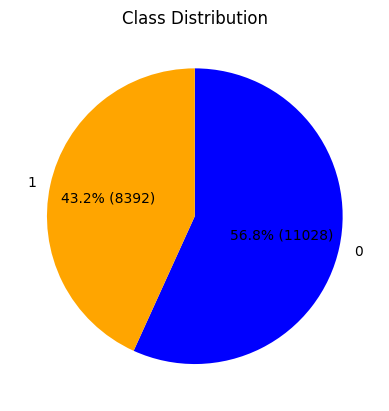

labels
0    0.567868
1    0.432132
Name: proportion, dtype: float64


In [7]:
# Plot the distribution as a pie chart with percentages
label_distribution.plot(kind='pie', 
                        autopct=lambda p: f'{p:.1f}% ({p * len(df) / 100:.0f})', 
                        colors=['blue', 'orange'], 
                        startangle=90, 
                        counterclock=False)

plt.title('Class Distribution')
plt.ylabel('')  # Hide the y-label as it's redundant in a pie chart
plt.show()

print(label_distribution)


### 3. Separate Features and Labels
Assuming your dataset has features and labels, we need to separate them. Let's assume the label column is named 'label'.

In [8]:
# Separate features and labels
X = df.drop(columns='labels')
y = df['labels']


### 4: Apply SMOTE
We will apply SMOTE to balance the dataset. To handle potential memory issues, we'll process the data in chunks.

In [9]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack


# Separate features and labels
X = df['cleaned_comment']
y = df['labels']

# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

def chunk_generator(data, labels, chunk_size):
    for i in range(0, data.shape[0], chunk_size):
        yield data[i:i + chunk_size], labels[i:i + chunk_size]

# Define chunk size based on memory capacity
chunk_size = 10000  # Adjust this based on your system's memory
X_smote_list = []
y_smote_list = []

smote = SMOTE(random_state=42)
for X_chunk, y_chunk in chunk_generator(X_vectorized, y, chunk_size):
    # Ensure X_chunk and y_chunk have consistent lengths
    if X_chunk.shape[0] != y_chunk.shape[0]:
        raise ValueError(f"Inconsistent number of samples: {X_chunk.shape[0]} in X_chunk, {y_chunk.shape[0]} in y_chunk")

    X_resampled, y_resampled = smote.fit_resample(X_chunk, y_chunk)
    X_smote_list.append(X_resampled)
    y_smote_list.append(y_resampled)

# Combine all chunks back together in sparse format
X_smote = vstack(X_smote_list)
y_smote = np.hstack(y_smote_list)

# # Save the resampled dataset
# resampled_data = pd.DataFrame.sparse.from_spmatrix(X_smote, columns=vectorizer.get_feature_names_out())
# resampled_data['labels'] = y_smote
# resampled_data.to_csv('/mnt/data/resampled_dataset.csv', index=False)


###  Visualize the resampled class distribution:

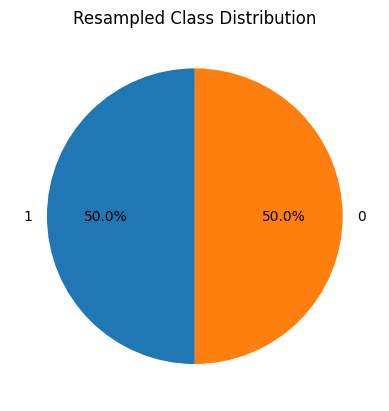

In [10]:
resampled_class_distribution = pd.Series(y_smote).value_counts(normalize=True)
resampled_class_distribution.plot.pie(autopct='%1.1f%%', startangle=90, title='Resampled Class Distribution')
plt.ylabel('')
plt.show()


### Save the resampled dataset

In [ ]:
# Save the resampled dataset
resampled_data = pd.DataFrame.sparse.from_spmatrix(X_smote, columns=vectorizer.get_feature_names_out())
resampled_data['labels'] = y_smote
resampled_data.to_csv('M:\\Internships\\infosys_springboard\\Notebooks\\Preprocessing\\resampled_dataset.csv', index=False)
